In [ ]:
# For Python users, below is the code:
# Decision tree

#Import Library
#Import other necessary libraries like pandas, numpy...
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
model = tree.DecisionTreeClassifier(criterion='gini') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
model.fit(X, y)
model.score(X, y)
#Predict Output
predicted= model.predict(x_test)

In [ ]:
'''
The following code is for the Random Forest
Created by - ANALYTICS VIDHYA
'''

# importing required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# read the train and test dataset
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

# view the top 3 rows of the dataset
print(train_data.head(3))

# shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)

# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

'''

Create the object of the Random Forest model
You can also add other parameters and test your code here
Some parameters are : n_estimators and max_depth
Documentation of sklearn RandomForestClassifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

'''
model = RandomForestClassifier()

# fit the model with the training data
model.fit(train_x,train_y)

# number of trees used
print('Number of Trees used : ', model.n_estimators)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


In [ ]:
The following code is for Gradient Boosting
Created by - ANALYTICS VIDHYA
'''

# importing required libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# read the train and test dataset
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

'''
Create the object of the GradientBoosting Classifier model
You can also add other parameters and test your code here
Some parameters are : learning_rate, n_estimators
Documentation of sklearn GradientBoosting Classifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
'''
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

## Python EDA

**EDA**

Using these systems, people are able rent a bike from a one locationand return it to a different place on an as-needed basis. Currently, there are over 500bike-sharing programs around the world. 

The data generated by these systems makes them attractive for researchers because theduration of travel, departure location, arrival location, and time elapsed is explicitlyrecorded. Bike sharing systems therefore function as a sensor network, which can beused for studying mobility in a city. Our aim here is to combine historical usage patternswith weather data and do exploratory data analysis of the Capital Bikeshare program inWashington, D.C. 

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sanketkangle/Exploratory-Data-Analysis/master/Bike-Sharing-problem/bikes_sharing_problem_dataset.csv', 
                 parse_dates =['datetime'])
# parse_dates
# converts datetime column from object dtype to datetime64 dtype. It willhelp us to manipulate and analyse datetime column in future.

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

Now, let us understand the dataset: The data (hourly rental data spanning two years)iscomprised of the first 19 days of each month. the coulmns/features are as below
- datetime — hourly date + timestamp
- season — 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday — whether the day is considered a holiday
- workingday — whether the day is neither a weekend nor holiday
- weather — 
   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +Scattered clouds
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp — temperature in Celsius
- atemp — “feels like” temperature in Celsius
- humidity — relative humidity
- windspeed — wind speed
- casual — number of non-registered user rentals initiated
- registered — number of registered user rentals initiated
- count — number of total rentals

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


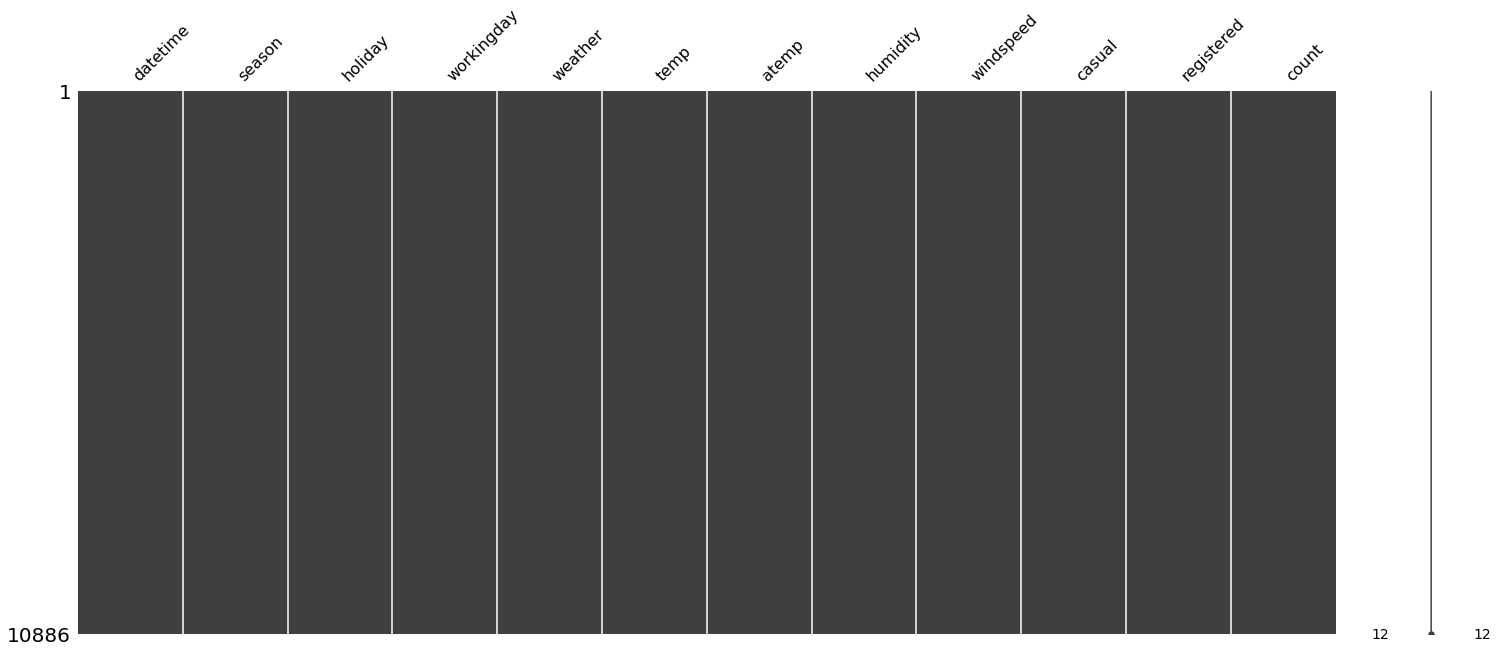

In [ ]:
# Dataset consists of total 10,886 records and Dtype for each column is as above. Columns
# season, holiday, workingday and weather are originally categoricalvariables, 
# but they are already encoded in numerical values.
msno.matrix(df)

In [ ]:
# False under each column name signifies there is no missing value in that column.
df.isna().value_counts()

datetime  season  holiday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  count
False     False   False    False       False    False  False  False     False      False   False       False    10886
dtype: int64

In [ ]:
set(df["season"]) 

{1, 2, 3, 4}

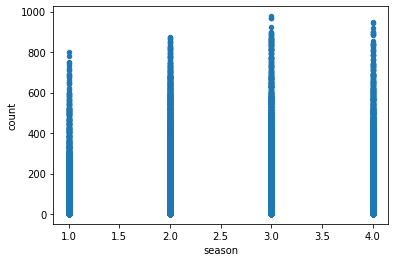

In [ ]:
# The feature count gives total number of rental at particular time. Let’s see how count isvaried w.r.t. other few features.
# 1 - Spring
# 2 - Summer
# 3 - Fall
# 4 - Winter

# From this plot we understand that for Fall
# season, the people used rental bike the mostand in spring
# the least.

df.plot.scatter(x='season', y='count')

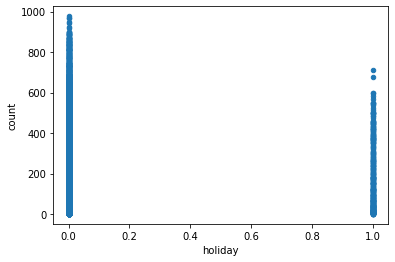

In [ ]:
# It is clear from this plot that on holiday, people use less rental bikes. The 
# cause for thismight be that a lot of them using bikes to go to office/work and 
# on holiday they are notusing it.
df.plot.scatter(x="holiday", y="count")

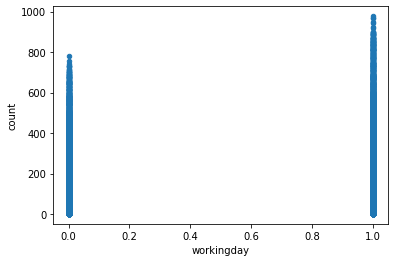

In [ ]:
# What we suspected in last plot is confirmed in this one. on
# workingday people usedmore rental bikes.
df.plot.scatter(x="workingday", y="count")

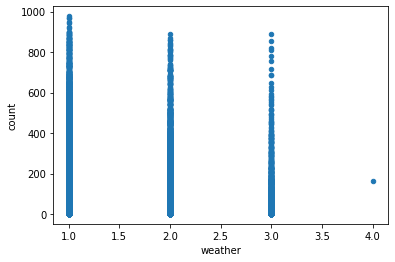

In [ ]:
# Recall weather column data fields:
# weather
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scatteredclouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# As weather is getting clear to stormy, number of bike users decreased. Also the 
# frequencyfor ‘4’ is low(only one data point) as such weather is also rare.

df.plot.scatter(x="weather", y='count')

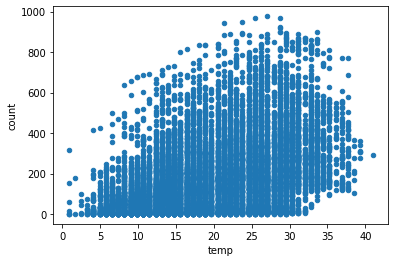

In [ ]:
# For extreme low temperature there are very few who used bikes and as temperature
# increases, the count also increases.
df.plot.scatter(x="temp", y="count")

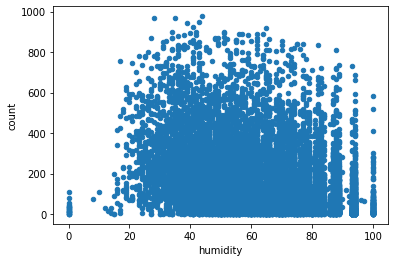

In [ ]:
# for extremely low and high humidity less bikes are in use which makes sense as 
# they arecorresponding to adverse weather conditions.
df.plot.scatter(x="humidity", y="count")

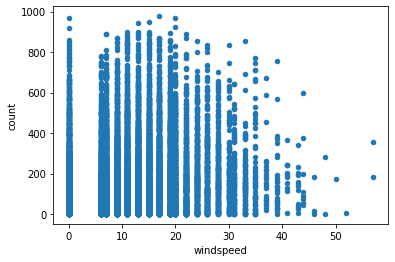

In [ ]:
# As wind speed increased, the count decreases gradually which is anticipated as againwith high wind speed associated with bad weather.
# In conclusion till now, we understood two important points:
# 1. Many people rent bike for traveling to office and home
# 2. Bad weather conditions have adverse effect on bike rentals
# Now, let’s focus on how the count varies during the day and how other features affect it.We have to first get
# hour of the day from date time column, and then work with it.
df.plot.scatter(x="windspeed", y="count")

In [ ]:
# Below is a function that will return a bar plot of
# count based on hour for a given year

# We created a function called plot_by_hour
# which takes input one dataframe(data) andyear.

#flag 1: we assign complete
# dataframe (both years 2011 & 2012) to dd

#flag 2: if year is provided as an argument to the function, then we slice the
# dataframe dd only for that year

#flag 3:creating a column called hour
# in dataframe dd and populating it with hourfrom
# datetime column

# flag 4: From dataframe dd, we are grouping the data by
# hour and workingday columns and then getting its
# count column and assigning it to a variable called
# by_hour

# flag 5: Returning the bar plot

def plot_by_hour (data, year=None, agg='sum'):
  dd = data #flag 1
  if year : #flag 2
    dd = dd[dd.datetime.dt.year == year]
  dd.loc[:, ('hour')] = dd.datetime.dt.hour #flag 3
  by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() #flag 4
  return by_hour.plot(kind='bar', title="year = {0}".format(year),figsize=(15,5), width=0.9) #flag 5

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

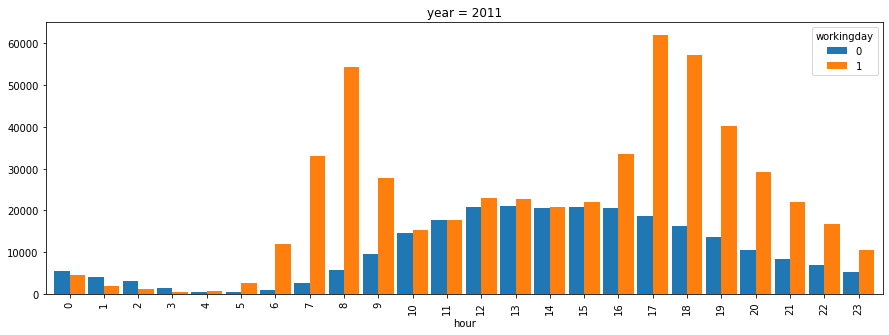

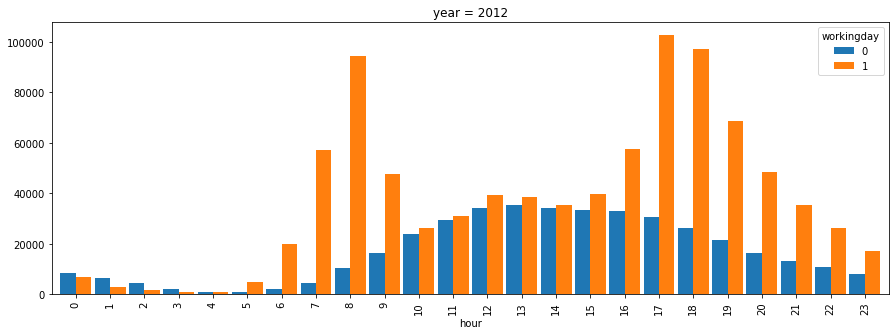

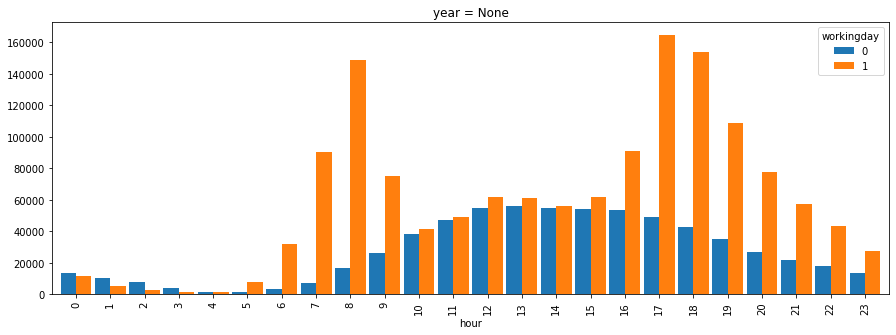

In [ ]:
plot_by_hour(df, year=2011)
plot_by_hour(df, year=2012)
plot_by_hour(df)

From above plots, it is clear that working professionals do use rental bikes forcommuting to office and home, as there are consistence spikes at rush hour(officestarting and ending hours) on working day which are not there on holidays. Also, innight time, the use of rental bike is minimal
The use of rental bikes had increases in 2012 than in 2011, let’s focus month-wise andhour-wise increase of rental bikes in 2012 than in 2011. Following is function to do thesame

In [ ]:
# We created a function plot_by_year
# which takes input dataframe(data), name ofcolumn(col) and title for plot(title)

# flag 1 : creating copy of dataframe so as to not disturb original dataset

# flat 2 : creating column named year in dataframe dd and populating with year
# extracted from datetime column of data

# flag 3 :creating column named month in dataframe dd
# and populating with monthextracted from datetime column of data

# flag 4 : creating column named hour in dataframe dd and populating with hour
# extracted from datetime column of data

# flag 5 : grouping dataframe dd on columns col(given as argument to function),year
# and aggregating their sum and storing it in variable by_year

# flag 6 : returning the plot

def plot_by_year (data,col, title):
  dd = data.copy() #flag 1
  dd['year'] = data.datetime.dt.year #flag 2
  dd['month'] = data.datetime.dt.month #flag 3
  dd['hour'] = data.datetime.dt.hour #flag 4
  by_year = dd.groupby([col, 'year'])["count"].agg('sum').unstack() #flag 5
  return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) #flag 6

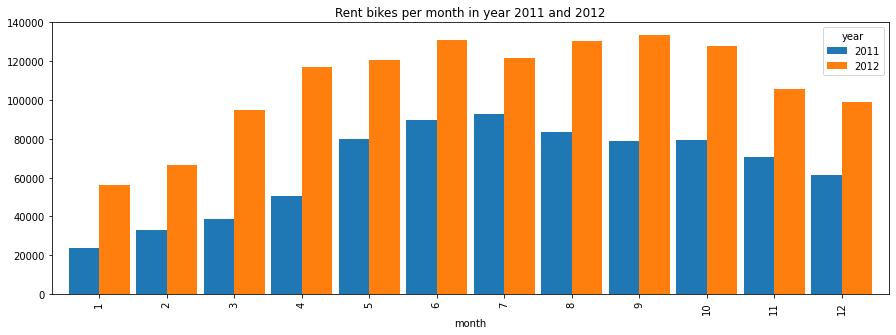

In [ ]:
# From the graph, it is clear that, in every month, 2012 has more bikes rented than2011. 
# Let’s see, does by hour also 2012 is leading or not
plot_by_year(df,'month', "Rent bikes per month in year 2011 and 2012")

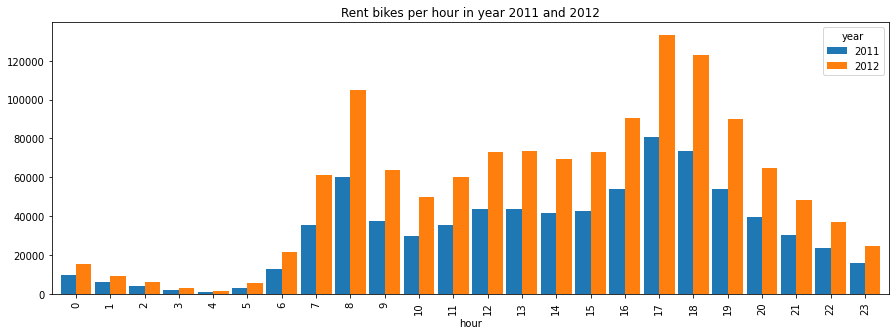

In [ ]:
# Yes! hourly also 2012 leads. This means in 2012, the rental got more popular i.e.marketing 
# strategy in 2011 was good that is why count increased in 2012.
plot_by_year(df, 'hour', 'Rent bikes per hour in year 2011 and 2012')

In [ ]:
df["year"] = df["datetime"].apply(lambda x : x.year)

In [ ]:
count_2011 = df[df.year==2011]['count'].agg('sum')
count_2012 = df[df.year==2012]['count'].agg('sum')
percentage_growth = (count_2012-count_2011)*100/count_2011
percentage_growth # Hence the percentage growth come around 66.69%

# Conclusion: (in addition to last conclusions)
# 3. In office starting and ending hours, the demand for rental bikes is more as many workingprofessional use it as a way of commute
# 4. In night time, the demand is very low
# 5. Marketing strategy used in 2011 must be efficient, as count has increased in 2012 bymargin of 66.69%

66.69207229350148

In [ ]:
txt = '''450
 00:17:53,457 --> 00:17:56,175
 Okay, but, um,
 thanks for being with us.

451
 00:17:56,175 --> 00:17:58,616
 But, um, if there's any
 college kids watching,

452
 00:17:58,616 --> 00:18:01,610
 But, um, but, um, but, um,
 but, um, but, um,

453
 00:18:01,610 --> 00:18:03,656
 We have to drink, professor.

 454
 00:18:03,656 --> 00:18:07,507
 It's the rules.
 She said "But, um"

455
 00:18:09,788 --> 00:18:12,515
 But, um, but, um, but, um...
 god help us all.
 '''
import re
len(re.findall("[B,b]ut, um", txt))

11

In [ ]:
str = """Email_Address,Nickname,Group_Status,Join_Year
aa@aaa.com,aa,Owner,2014
bb@bbb.com,bb,Member,2015
cc@ccc.com,cc,Member,2017
dd@ddd.com,dd,Member,2016
ee@eee.com,ee,Member,2020
"""
# In order to extract only the domain names from the email addresses from the 
# above string (for eg. “aaa”, “bbb”..) you write the following code:
# What number should be mentioned instead of “__” to index only the domains?
for i in re.finditer('([a-zA-Z]+)@([a-zA-Z]+).(com)', str):
    print( i.group(2))

aaa
bbb
ccc
ddd
eee


In [ ]:
#  Which of the following is a correct implementation of mean squared error (MSE) metric?
def MSE(real_target, predicted_target):
  return np.mean((real_target - predicted_target)**2)

In [ ]:
# Which of the following code will export dataframe (df) in CSV file, encoded in 
# UTF-8 after hiding index & header labels.

# df_1.to_csv(‘../data/file.csv’,encoding=’utf-8′,index=False,header=False)

In [ ]:
# You want to write a generic code to calculate n-gram of the text. The 2-gram of this sentence
# would be [[“this, “is”], [“is”, “a”], [“a, “sample”], [“sample”, “text”]]
# Which of the following code would be correct?

# For a given a sentence:
# ‘this is a sample text’.
def generate_ngrams(text, n):
  words = text.split()
  output = [] 
  for i in range(len(words)-n+1):
    output.append(words[i:i+n])
  return output

generate_ngrams(text="this is a sample text", n=2)

[['this', 'is'], ['is', 'a'], ['a', 'sample'], ['sample', 'text']]

In [ ]:
# This method is used to evaluate a Python expression as a string using various 
# back ends. It returns ndarray, numeric scalar, DataFrame, Series.

# importing package
import pandas

# evaluate the expressions given
# in form of string
print(pandas.eval("2+3"))
print(pandas.eval("2+3*(5-2)"))


5
11


In [ ]:
# How would you reset the index of a dataframe to a given list? The new index is given as:
# new_index=[‘Safari’,’Iceweasel’,’Comodo Dragon’,’IE10′,’Chrome’]

# df.reset_index(new_index) 

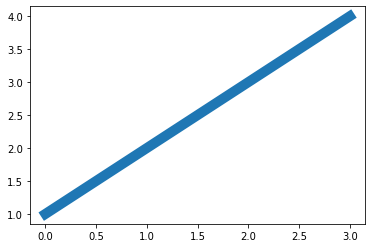

In [ ]:
# How to set a line width in the plot given below?
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], lw=10)
plt.show()

In [ ]:
# You are given reviews for movies below:

reviews = ["movie is unwatchable no matter how decent the first half is.",
"somewhat funny and well  paced action thriller that has jamie foxx as a hapless fast  talking hoodlum who is chosen by an overly demanding", 
"morse is okay as the agent who comes up with the ingenious plan to get whoever did it at all cost."]

# Your task is to find sentiments from the review above. For this, you first write 
# a code to find count of individual words in all the sentences.
from collections import Counter
counts = Counter()

for i in range(len(reviews)):
    for word in reviews[i].split(" "):
        counts[word] += 1
print(counts)

Counter({'is': 3, 'the': 3, '': 2, 'as': 2, 'who': 2, 'movie': 1, 'unwatchable': 1, 'no': 1, 'matter': 1, 'how': 1, 'decent': 1, 'first': 1, 'half': 1, 'is.': 1, 'somewhat': 1, 'funny': 1, 'and': 1, 'well': 1, 'paced': 1, 'action': 1, 'thriller': 1, 'that': 1, 'has': 1, 'jamie': 1, 'foxx': 1, 'a': 1, 'hapless': 1, 'fast': 1, 'talking': 1, 'hoodlum': 1, 'chosen': 1, 'by': 1, 'an': 1, 'overly': 1, 'demanding': 1, 'morse': 1, 'okay': 1, 'agent': 1, 'comes': 1, 'up': 1, 'with': 1, 'ingenious': 1, 'plan': 1, 'to': 1, 'get': 1, 'whoever': 1, 'did': 1, 'it': 1, 'at': 1, 'all': 1, 'cost.': 1})


In [ ]:
import numpy as np

df = pd.DataFrame({'Id':[1,2,3,4],'val':[2,5,np.nan,6]})
print(df.val == np.nan)

0    False
1    False
2    False
3    False
Name: val, dtype: bool


In [ ]:
D = ["A","B","C","D","E","AA","AB"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# What will be the output of the print statement below ?
le.fit_transform(D)

array([0, 3, 4, 5, 6, 1, 2])

In [ ]:
# Suppose you are given the below web page
html_doc = """
 <!DOCTYPE html>
 <htmllang="en">
 <head>
 <metacharset="utf-8">
 <metaname="viewport" content="width=device-width">
 <title>udacity/deep-learning: Repo for the Deep Learning Nanodegree Foundations program.</title>
 <linkrel="search" type="application/opensearchdescription+xml" href="/opensearch.xml" title="GitHub">
 <linkrel="fluid-icon" href="https://github.com/fluidicon.png" title="GitHub">
 <metaproperty="fb:app_id" content="1401488693436528">  
 <linkrel="assets" href="https://assets-cdn.github.com/">   
 ... 

"""

# To read the title of the webpage you are using BeautifulSoup. What is the code for this? 
# Hint: You have to extract text in title tag

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc,"html.parser")
print(soup.title.string)


udacity/deep-learning: Repo for the Deep Learning Nanodegree Foundations program.


In [ ]:
#  You want to read a website which has url as “www.abcd.org”. 
# Which of the following options will perform this task?

import requests
requests.get("https://www.analyticsvidhya.com/blog/2017/05/questions-python-for-data-science/")

# urllib2.urlopen(www.abcd.org)


<Response [200]>

In [ ]:
# tup = (1, 2, 3, 4, 5 )

# Now, you want to update the value of this tuple at 2nd index to 10. 
# Which of the following option will you choose?

# Ans => tuple cannot be updated

In [ ]:
# Suppose you are trying to read a file “temp.csv” using pandas and you get the following error.

# Traceback (most recent call last):
# File "<input>", line 1, in<module>
# UnicodeEncodeError: 'ascii' codec can't encode character.

# Which of the following would likely correct this error?
# Note: pandas has been imported as pd

# pd.read_csv(“temp.csv”, encoding=’utf-8′)

In [ ]:
# Suppose, you are given 2 list – City_A and City_B.
# City_A = [‘1′,’2′,’3′,’4’]
# City_B = [‘2′,’3′,’4′,’5’]
# In both cities, some values are common. Which of the following code will find 
# the name of all cities which are present in “City_A” but not in “City_B”.

city_A = ["1", "2", "3", "4"]
city_B = ["2", "3", "4", "5"]

[i for i in city_A if i not in city_B]

['1']

In [ ]:
# How would you read data from the file using pandas by skipping the first three lines?

# Note: pandas library has been imported as pd In the given file (email.csv), the first three records are empty.

# ,,,

# ,,,

# ,,,

# Email_Address,Nickname,Group_Status,Join_Year

# aa@aaa.com,aa,Owner,2014

# bb@bbb.com,bb,Member,2015

# cc@ccc.com,cc,Member,2017

# dd@ddd.com,dd,Member,2016


# ---> read_csv(‘email.csv’, skiprows=3)

In [ ]:
df = pd.DataFrame({'Click_Id':['A','B','C','D','E'],'Count':[100,200,300,400,250]})
# Suppose you want to assign a df to df1, so that you can recover original content of df in future using df1 as below.
df1 = df

# Now you want to change some values of “Count” column in df.
df.loc[df.Click_Id == 'A', 'Count'] += 100

# Which of the following will be the right output for the below print statement?
print(df.Count.values,df1.Count.values)

[200 200 300 400 250] [200 200 300 400 250]


In [ ]:
# Suppose you are given a data frame df.

df = pd.DataFrame({'Click_Id':['A','B','C','D','E'],'Count':[100,200,300,400,250]})

# In many data science projects, you are required to convert a dataframe into a dictionary. 
# Suppose you want to convert “df” into a dictionary such that ‘Click_Id’ will be the key and 
# ‘Count’ will be the value for each key. Which of the following options will give you the desired result?

# Note: Pandas library has been imported as pd

display(df.to_dict())

# or

df.set_index("Click_Id")["Count"].to_dict()

{'Click_Id': {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'},
 'Count': {0: 100, 1: 200, 2: 300, 3: 400, 4: 250}}

{'A': 100, 'B': 200, 'C': 300, 'D': 400, 'E': 250}

In [ ]:
# Consider a function “fun” which is defined below:
def fun(x):
  x[0] = 5
  return x

# Now you define a list which has three numbers in it.
g = [10,11,12]

print(fun(g), g)

# 5,11,12 --- 10,11,12

[5, 11, 12] [5, 11, 12]


In [ ]:
# Imagine, you have a dataframe train file with 2 columns & 3 rows, which is loaded in pandas.

import pandas as pd
train  = pd.DataFrame({'id':[1,2,4],'features':[["A","B","C"],["A","D","E"],["C","D","F"]]})
train
# Now you want to apply a lambda function on “features” column: 
train['features_t'] = train["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))

# What will be the output of following print command?
print(train['features_t'])

0    A B C
1    A D E
2    C D F
Name: features_t, dtype: object


In [ ]:
# You have uploaded the dataset in csv format on google spreadsheet and shared it publicly. 
# You want to access it in python, how can you do this?

# Note: Library StringIO has been imported as StringIO.

# link = https://docs.google.com/spreadsheets/d/...
# source = StringIO.StringIO(requests.get(link).content))
# data = pd.read_csv(source)

In [ ]:
# How would you import a decision tree classifier in sklearn?

# from sklearn.tree import DecisionTreeClassifier

In [ ]:
# While reading a csv file with numpy, you want to automatically fill missing 
# values of column “Date_Of_Joining” with date “01/01/2010

# Which command will be appropriate to fill missing value while reading the file with numpy? 
# Note: numpy has been imported as np

# filling_values = (“-“, 0, 01/01/2010, 0)
# temp = np.genfromtxt(filename, filling_values=filling_values)

In [ ]:
# Suppose you want to join train and test dataset (both are two numpy arrays 
# train_set and test_set) into a resulting array (resulting_set) to do data 
# processing on it simultaneously. This is as follows:

train_set = np.array([1, 2, 3])
test_set = np.array([[0, 1, 2], [1, 2, 3]])

# resulting_set --> [[1, 2, 3], [0, 1, 2], [1, 2, 3]]
# How would you join the two arrays?

resulting_set = np.vstack([train_set, test_set])
resulting_set

In [ ]:
# How would you create this identity matrix in python?
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# We want to convert the below string in date-time value:

import time
str = '21/01/2017'
datetime_value = time.strptime(str,"%d/%m/%Y")
datetime_value

time.struct_time(tm_year=2017, tm_mon=1, tm_mday=21, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=21, tm_isdst=-1)

In [ ]:
# You have built a machine learning model which you wish to freeze now and use later.
# Which of the following command can perform this task for you?

# Note: Pickle library has been imported as pkl.
# pkl.dump(model, “file”)

In [ ]:
# Assume, you are given two lists:

a = [1,2,3,4,5]

b = [6,7,8,9]

# The task is to create a list which has all the elements of a and b in one dimension.
# Output:
# a = [1,2,3,4,5,6,7,8,9]

a.extend(b)
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


## RNN

In [11]:
import torch
from torch import nn

import numpy as np

First, we'll define the sentences that we want our model to output when fed with the first word or the first few characters.

Then we'll create a dictionary out of all the characters that we have in the sentences and map them to an integer. This will allow us to convert our input characters to their respective integers (char2int) and vice versa (int2char).

In [12]:
text = ['hey how are you','good i am fine','have a nice day']

# Join all the sentences together and extract the unique characters from the combined sentences
chars = set(''.join(text))

# Creating a dictionary that maps integers to the characters
int2char = dict(enumerate(chars))

# Creating another dictionary that maps characters to integers
char2int = {char: ind for ind, char in int2char.items()}

# The char2int dictionary will look like this: It holds all the letters/symbols 
# that were present in our sentences and maps each of them to a unique integer.
char2int

{' ': 7,
 'a': 10,
 'c': 13,
 'd': 3,
 'e': 9,
 'f': 4,
 'g': 14,
 'h': 15,
 'i': 0,
 'm': 11,
 'n': 12,
 'o': 5,
 'r': 2,
 'u': 16,
 'v': 1,
 'w': 8,
 'y': 6}

Next, we'll be padding our input sentences to ensure that all the sentences are of standard length. While RNNs are typically able to take in variably sized inputs, we will usually want to feed training data in batches to speed up the training process. In order to used batches to train on our data, we'll need to ensure that each sequence within the input data is of equal size.

Therefore, in most cases, padding can be done by filling up sequences that are too short with 0 values and trimming sequences that are too long. In our case, we'll be finding the length of the longest sequence and padding the rest of the sentences with blank spaces to match that length.

In [13]:
# Finding the length of the longest string in our data
maxlen = len(max(text, key=len))

# Padding

# A simple loop that loops through the list of sentences and adds a ' ' whitespace until the length of
# the sentence matches the length of the longest sentence
for i in range(len(text)):
  while len(text[i])<maxlen:
      text[i] += ' '

As we're going to predict the next character in the sequence at each time step, we'll have to divide each sentence into:

Input data
- The last input character should be excluded as it does not need to be fed into the model.

Target/Ground Truth Label
- One time-step ahead of the Input data as this will be the "correct answer" for the model at each time step corresponding to the input data

In [14]:
# Creating lists that will hold our input and target sequences
input_seq = []
target_seq = []

for i in range(len(text)):
    # Remove last character for input sequence
  input_seq.append(text[i][:-1])
    
    # Remove first character for target sequence
  target_seq.append(text[i][1:])
  print("Input Sequence: {}\nTarget Sequence: {}".format(input_seq[i], target_seq[i]))

Input Sequence: hey how are yo
Target Sequence: ey how are you
Input Sequence: good i am fine
Target Sequence: ood i am fine 
Input Sequence: have a nice da
Target Sequence: ave a nice day


Our input sequence and target sequence will look like this:

Input Sequence: hey how are yo
Target Sequence: ey how are you
The target sequence will always be one-time step ahead of the input sequence.

Now we can convert our input and target sequences to sequences of integers instead of a sequence of characters by mapping them using the dictionaries we created above. This will allow us to one-hot-encode our input sequence subsequently.

In [15]:
for i in range(len(text)):
    input_seq[i] = [char2int[character] for character in input_seq[i]]
    target_seq[i] = [char2int[character] for character in target_seq[i]]

Before encoding our input sequence into one-hot vectors, we'll define 3 key variables:

1. dict_size: Dictionary size - The number of unique characters that we have in our text
- This will determine the one-hot vector size as each character will have an assigned index in that vector

2. seq_len: The length of the sequences that we're feeding into the model
- As we standardized the length of all our sentences to be equal to the longest sentences, this value will be the max length - 1 as we removed the last character input as well

3. batch_size: The number of sentences that we defined and are going to feed into the model as a batch

In [16]:
dict_size = len(char2int)
seq_len = maxlen - 1
batch_size = len(text)

def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    
    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

We also defined a helper function that creates arrays of zeros for each character and replaces the corresponding character index with a 1.

In [17]:
# Input shape --> (Batch Size, Sequence Length, One-Hot Encoding Size)
input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)

Since we're done with all the data pre-processing, we can now move the data from NumPy arrays to PyTorch's very own data structure - Torch Tensors.

In [18]:
input_seq = torch.from_numpy(input_seq)
target_seq = torch.Tensor(target_seq)

Now we've reached the fun part of this project! We'll be defining the model using the Torch library, and this is where you can add or remove layers, be it fully connected layers, convolutional layers, vanilla RNN layers, LSTM layers, and many more! In this post, we'll be using the basic nn.rnn to demonstrate a simple example of how RNNs can be used.

Before we start building the model, let's use a built-in feature in PyTorch to check the device we're running on (CPU or GPU). This implementation will not require GPU as the training is really simple. However, as you progress on to large datasets and models with millions of trainable parameters, using the GPU will be very important to speed up your training.

In [19]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


To start building our own neural network model, we can define a class that inherits PyTorch’s base class(nn.module) for all neural network modules. After doing so, we can start defining some variables and also the layers for our model under the constructor. For this model, we’ll only be using 1 layer of RNN followed by a fully connected layer. The fully connected layer will be in charge of converting the RNN output to our desired output shape.

We’ll also have to define the forward pass function under forward() as a class method. The forward function is executed sequentially, therefore we’ll have to pass the inputs and the zero-initialized hidden state through the RNN layer first, before passing the RNN outputs to the fully-connected layer. Note that we are using the layers that we defined in the constructor.

The last method that we have to define is the method that we called earlier to initialize the hidden state - init_hidden(). This basically creates a tensor of zeros in the shape of our hidden states.

In [20]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

After defining the model above, we'll have to instantiate the model with the relevant parameters and define our hyper-parameters as well. The hyper-parameters we're defining below are:

- n_epochs: Number of Epochs --> Number of times our model will go through the entire training dataset
- lr: Learning Rate --> Rate at which our model updates the weights in the cells each time back-propagation is done
For a more in-depth guide on hyper-parameters, you can refer to this comprehensive article.

Similar to other neural networks, we have to define the optimizer and loss function as well. We’ll be using CrossEntropyLoss as the final output is basically a classification task and the common Adam optimizer.

In [21]:
# Instantiate the model with hyperparameters
model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=12, n_layers=1)
# We'll also set the model to the device that we defined earlier (default is CPU)
model.to(device)

# Define hyperparameters
n_epochs = 100
lr=0.01

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

Now we can begin our training! As we only have a few sentences, this training process is very fast. However, as we progress, larger datasets and deeper models mean that the input data is much larger and the number of parameters within the model that we have to compute is much more.

In [22]:
# Training Run
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    input_seq.to(device)
    output, hidden = model(input_seq)
    loss = criterion(output, target_seq.view(-1).long())
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordingly
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100............. Loss: 2.3879
Epoch: 20/100............. Loss: 2.0433
Epoch: 30/100............. Loss: 1.6828
Epoch: 40/100............. Loss: 1.3055
Epoch: 50/100............. Loss: 0.9631
Epoch: 60/100............. Loss: 0.6900
Epoch: 70/100............. Loss: 0.4902
Epoch: 80/100............. Loss: 0.3539
Epoch: 90/100............. Loss: 0.2629
Epoch: 100/100............. Loss: 0.2024


Let’s test our model now and see what kind of output we will get. As a first step, we'll define some helper function to convert our model output back to text.

In [23]:
# This function takes in the model and character as arguments and returns the next character prediction and hidden state
def predict(model, character):
    # One-hot encoding our input to fit into the model
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)
    character.to(device)
    
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    # Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()

    return int2char[char_ind], hidden

In [24]:
# This function takes the desired output length and input characters as arguments, returning the produced sentence
def sample(model, out_len, start='hey'):
    model.eval() # eval mode
    start = start.lower()
    # First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    # Now pass in the previous characters and get a new one
    for ii in range(size):
        char, h = predict(model, chars)
        chars.append(char)

    return ''.join(chars)

Let's run the function with our model and the starting words 'good'.

In [25]:
sample(model, 15, 'good')

'good i am fine '

As we can see, the model is able to come up with the sentence ‘good i am fine ‘ if we feed it with the words ‘good’. Pretty good for a few lines of code, yea?